In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Uncomment for first use
#nltk.download('punkt')
#nltk.download('stopwords')

In [51]:
#df=pd.read_csv('../data/train.csv')
df=pd.read_csv('train.csv')

**Taget : Identify wheter the tweet is about a real disaster or not**

# Basic Data Overview

In [52]:
df.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [53]:
df.shape

(7613, 5)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [55]:
df['keyword'].nunique()

221

In [56]:
df['location'].nunique()

3341

**First observations**
* We have 5 columns and 7613 rows
* We have some missing values in location and keyword column
* We have 221 unique keywords and more than 3000 unique locations
* Locations are in different format in some rows

# EDA

**1. Target Analysis**

<Axes: xlabel='target', ylabel='Count'>

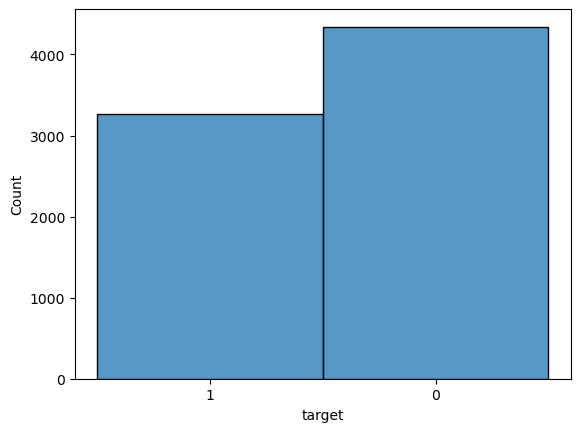

In [57]:
sns.histplot(df['target'].astype(str))

There is no class imbalance - the number of false Tweets is slightly bigger

**Number of words in caps lock vs target**

In [58]:
def count_caps_lock(text):
    words = text.split()
    caps_lock_words = [word for word in words if word.isupper()]
    return len(caps_lock_words)


In [59]:
pd.set_option('display.max_colwidth', None)

In [60]:
df['Caps_lock_word_count'] = df['text'].apply(count_caps_lock)
df[['text','Caps_lock_word_count']].head(20)

,text,Caps_lock_word_count
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,0
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,0
3,"13,000 people receive #wildfires evacuation orders in California",0
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,0
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,0
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",0
7,I'm on top of the hill and I can see a fire in the woods...,1
8,There's an emergency evacuation happening now in the building across the street,0
9,I'm afraid that the tornado is coming to our area...,0


<Axes: xlabel='target', ylabel='Caps_lock_word_count'>

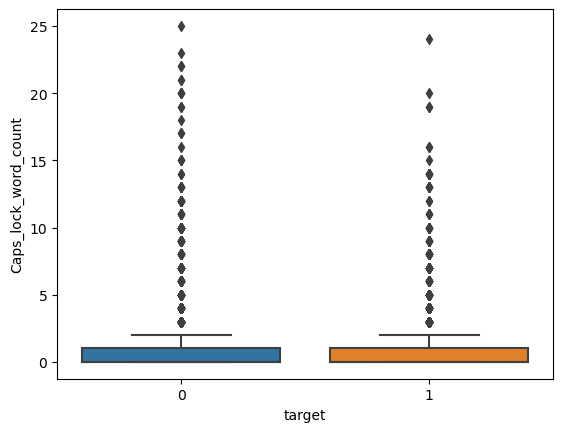

In [61]:
sns.boxplot(data=df, x='target', y='Caps_lock_word_count')

<Axes: xlabel='Caps_lock_word_count', ylabel='count'>

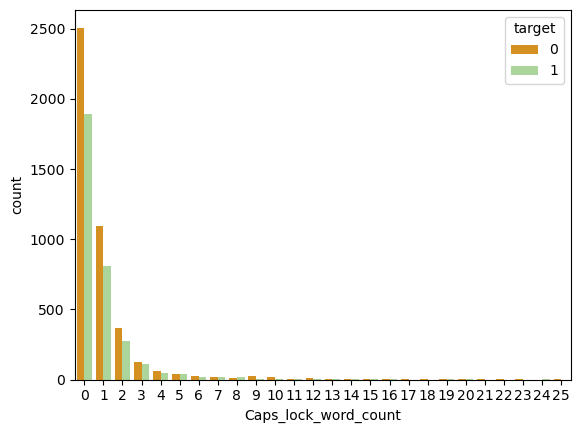

In [62]:
sns.countplot(df, x='Caps_lock_word_count',hue='target',palette=['#f19805','#a8df92'])

We can see that the majority of tweets don't have many words in caps lock. However we can see that the percentage of true tweets increases with the increase of caps lock words - more than 4 caps lock words have 50/50 false and true tweets

**Number of '!' vs target**

In [63]:
def count_exclamation_mark(text):
    return len(re.findall(r'!', text))

In [64]:
df['Number_of_exclamation'] = df['text'].apply(count_exclamation_mark)
df.head(10)

,id,keyword,location,text,target,Caps_lock_word_count,Number_of_exclamation
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,0,0
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,0,0
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,1,0
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,0,0


<Axes: xlabel='Number_of_exclamation', ylabel='count'>

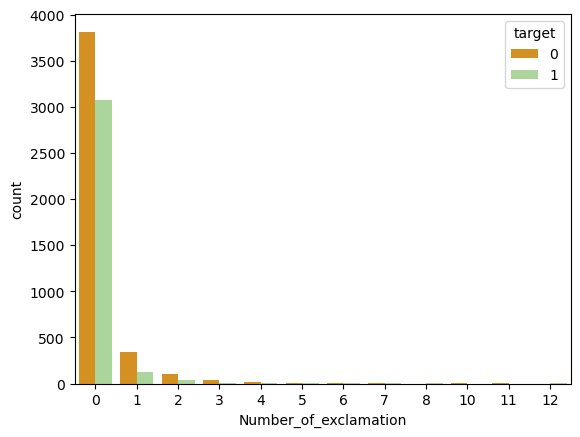

In [65]:
sns.countplot(df,x='Number_of_exclamation', hue='target',palette=['#f19805','#a8df92'])

In [66]:
pd.crosstab(df['Number_of_exclamation'], df['target'], normalize='index')*100

target,0,1
Number_of_exclamation,,
0,55.395997,44.604003
1,72.594142,27.405858
2,72.727273,27.272727
3,78.846154,21.153846
4,80.000000,20.000000
5,50.000000,50.000000
6,71.428571,28.571429
7,66.666667,33.333333
8,0.000000,100.000000


There is no obvious pattern, most tweets have 0,1,2 exclamation marks

In most groups there are more fake tweets

**Number of # vs target**

In [67]:
def count_hashtags(text):
    return len(re.findall(r'#\w+', text))

In [68]:
df['Number_of_hashtags']= df['text'].apply(count_hashtags)
df.head(20)

,id,keyword,location,text,target,Caps_lock_word_count,Number_of_exclamation,Number_of_hashtags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,1,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0,2
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,0,0,3
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,0,0,2
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,1,0,0
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,0,0,0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,0,0,0


<Axes: xlabel='target', ylabel='Number_of_hashtags'>

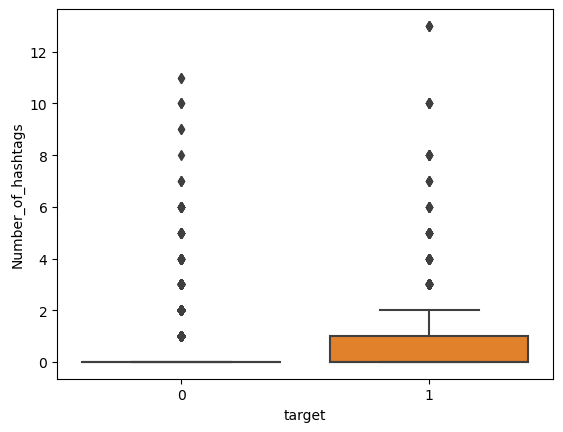

In [69]:
sns.boxplot(data=df, x='target', y='Number_of_hashtags')

<Axes: xlabel='Number_of_hashtags', ylabel='count'>

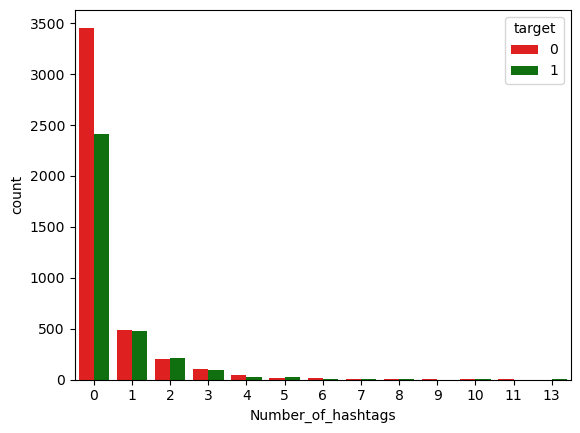

In [70]:
sns.countplot(df, x='Number_of_hashtags', hue='target', palette=['red','green'])

The majority of tweets have 0 hashtags. For 1,2,3 hashtags there are circa 50/50 false and true tweets

**Number of words vs target**

In [71]:
def count_words(text):
    return len(text.split())

In [72]:
df['Word_count'] = df['text'].apply(count_words)

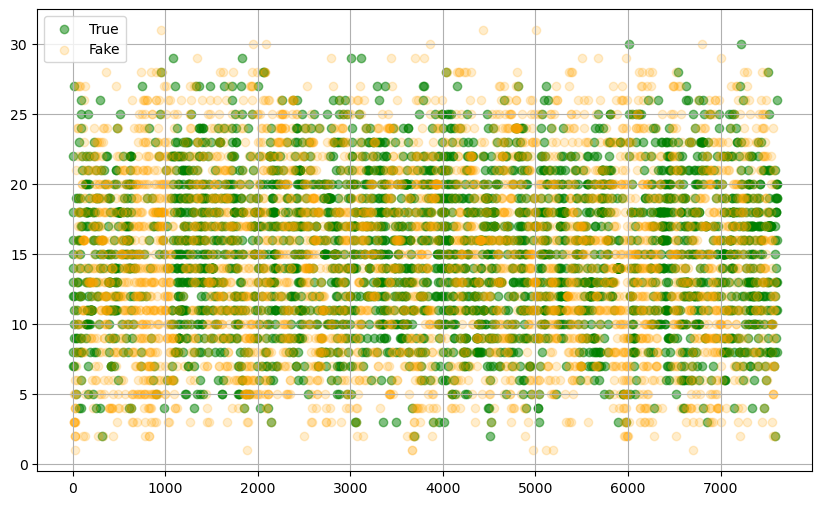

In [73]:
true = df[df['target']==1]
false = df[df['target']==0]

plt.figure(figsize=(10,6))
plt.scatter(true.index, true['Word_count'], label='True', color='green',alpha=0.5)
plt.scatter(false.index, false['Word_count'], label='Fake', color='orange',alpha=0.2)
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='Word_count', ylabel='count'>

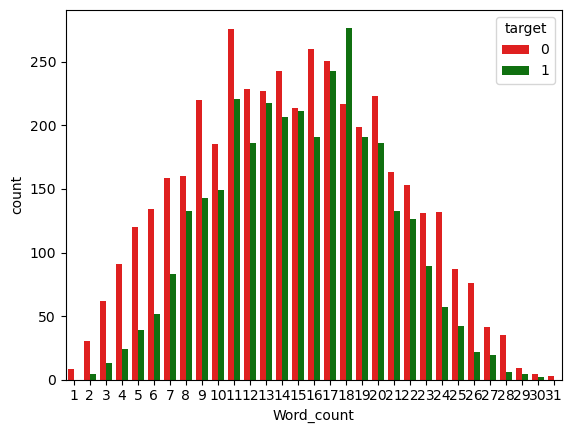

In [74]:
sns.countplot(df, x='Word_count', hue='target', palette=['red','green'])

* there is no visible pattern between number of words and target
* We can only see that if the tweet is very short (1-10 words) or very long (>30 words) it is probably fake
* looks like normal distribution

**Punctuation vs target**

In [75]:
def count_punctuation(text):
    punctuation_pattern = r'[^\w\s]'
    punct = re.findall(punctuation_pattern, text)
    return len(punct)

In [76]:
df['Punctuation_count'] = df['text'].apply(count_punctuation)

<Axes: xlabel='Punctuation_count', ylabel='count'>

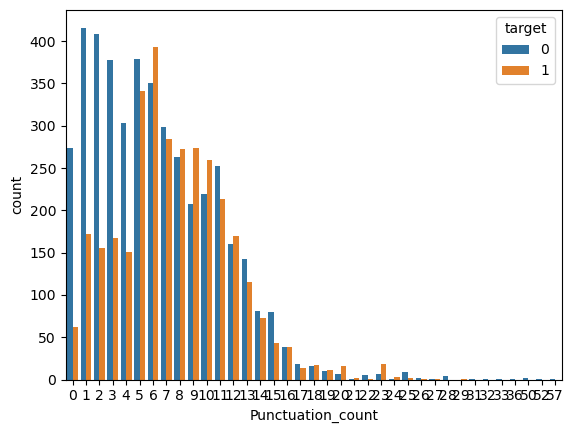

In [77]:
sns.countplot(df, x='Punctuation_count', hue='target')

* we can see a visible pattern : tweets with little punctuation tend to be fake, and tweets with 6-11 punctuation signs are more likely to be true

**Number of links vs target**

In [78]:
def count_links(text):
    url_pattern = r'https\S+'
    links=re.findall(url_pattern,text)
    return len(links)

In [79]:
df['Link_count']=df['text'].apply(count_links)

<Axes: xlabel='Link_count', ylabel='count'>

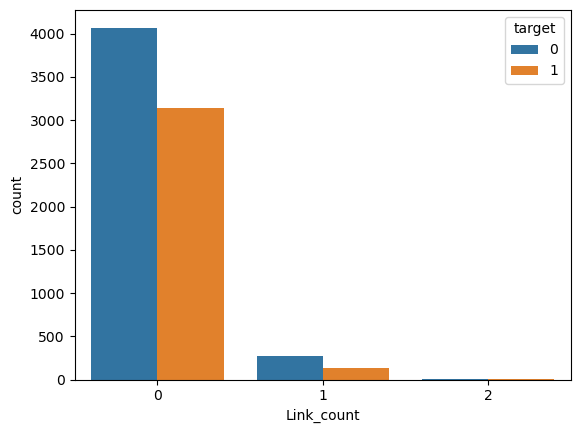

In [80]:
sns.countplot(df, x='Link_count', hue='target')

* There are 0,1 or 2 links

In [81]:
pd.crosstab(df['Link_count'], df['target'], normalize='index')*100

target,0,1
Link_count,,
0,56.466833,43.533167
1,66.915423,33.084577
2,80.000000,20.000000


* The proporion of fake and true tweets is similar in groups that have the most observations, for 2 links there are more fake tweets

**Number of stopwords v target**

In [82]:
def count_stopwords(text):
    stop_words = set(stopwords.words('english'))
    sw = [word for word in text.split() if word in stop_words]
    return len(sw)

In [83]:
df['Stopword_count']=df['text'].apply(count_stopwords)

<Axes: xlabel='Stopword_count', ylabel='count'>

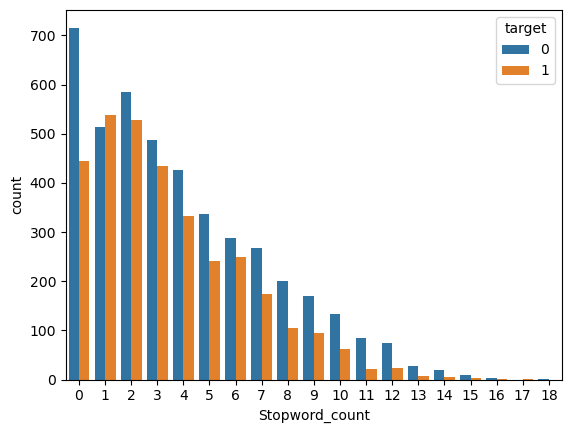

In [84]:
sns.countplot(df, x='Stopword_count', hue='target')

In [85]:
pd.crosstab(df['Stopword_count'],df['target'],normalize='index')*100

target,0,1
Stopword_count,,
0,61.724138,38.275862
1,48.812915,51.187085
2,52.565257,47.434743
3,52.819957,47.180043
4,56.126482,43.873518
5,58.304498,41.695502
6,53.445065,46.554935
7,60.407240,39.592760
8,65.901639,34.098361


* The percent of fake tweets is slightly higer when there are more stop words

**Feature correlation**

<Axes: >

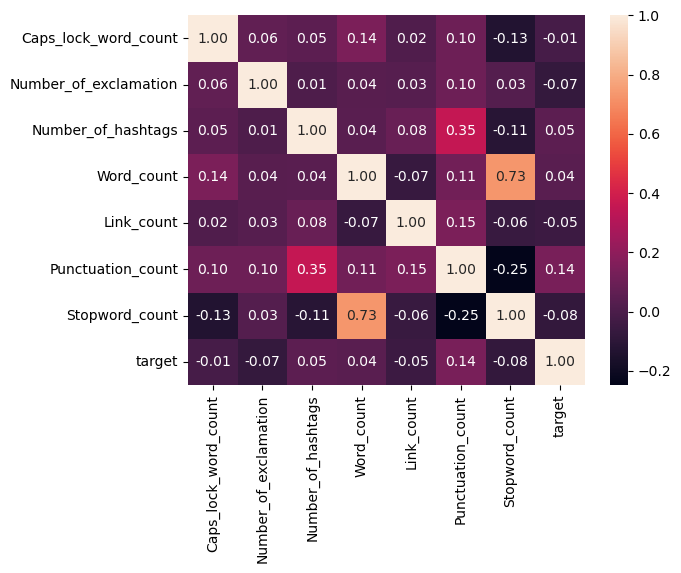

In [86]:
sns.heatmap(df[['Caps_lock_word_count','Number_of_exclamation','Number_of_hashtags','Word_count','Link_count','Punctuation_count','Stopword_count','target']].corr(), annot=True, fmt='.2f')

* The most correlated feature with the tagret is Punctuation_count

**2. TEXT CLEANING**
* convert to lower case
* delete punctuation 
* remove https links
* remove stopwords (a, the, an ...)
* tokenise
* lmmatization

In [91]:
cleaned_text_df = df.copy()

#removig punctuation and changing to lower case
def to_lower_remove_punctuation(text):
    punctuation_pattern = r'[^\w\s]'
    text_without_punctuation = re.sub(punctuation_pattern,'',text)
    to_lower = text_without_punctuation.lower()
    return to_lower

In [94]:
# Removing https links 
def remove_links(text):
    url_pattern = r'https\S+'
    
    text_without_links = re.sub(url_pattern, '', text)
    
    return text_without_links

In [100]:
# Tokenizing the whole sentence
def tokenize_sentence(sentence):
    return word_tokenize(sentence)

# Assigning all stop words in English
stop_words = set(stopwords.words('english'))

# Filtering all stop words in each sentence
def filter_stop_words(tokenized_tweet):
    return [word for word in tokenized_tweet if word not in stop_words]


In [106]:
from nltk.stem import WordNetLemmatizer
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word,'v') for word in words]
    # do skonczenia bo tu chyba by się przydało najpierw znaleźć jaka to część mowy ('v' to jest że do czasowników będzie sprowadzać)

In [105]:
def clean_text(text): #all cleaning process
    without_punctuation = to_lower_remove_punctuation(text)
    without_links = remove_links(without_punctuation)
    tokenized = tokenize_sentence(without_links)
    without_stopwords = filter_stop_words(tokenized)
    return without_stopwords

In [104]:
cleaned_text_df['cleaned_tokens'] = cleaned_text_df['text'].apply(clean_text)
cleaned_text_df['cleaned_text'] = cleaned_text_df['cleaned_tokens'].apply(lambda x: ' '.join(x)) #I dont know if we need this
cleaned_text_df

,id,keyword,location,text,target,Caps_lock_word_count,Number_of_exclamation,Number_of_hashtags,Word_count,Punctuation_count,Link_count,Stopword_count,cleaned_text,cleaned_tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,1,0,1,13,1,0,5,deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgive, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,0,0,7,1,0,0,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,0,0,22,3,0,9,residents asked shelter place notified officers evacuation shelter place orders expected,"[residents, asked, shelter, place, notified, officers, evacuation, shelter, place, orders, expected]"
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,0,1,8,2,0,1,13000 people receive wildfires evacuation orders california,"[13000, people, receive, wildfires, evacuation, orders, california]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,0,2,16,2,0,6,got sent photo ruby alaska smoke wildfires pours school,"[got, sent, photo, ruby, alaska, smoke, wildfires, pours, school]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,0,0,0,11,5,0,2,two giant cranes holding bridge collapse nearby homes httptcostfmbbzfb5,"[two, giant, cranes, holding, bridge, collapse, nearby, homes, httptcostfmbbzfb5]"
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,0,0,0,20,4,0,7,aria_ahrary thetawniest control wild fires california even northern part state troubling,"[aria_ahrary, thetawniest, control, wild, fires, california, even, northern, part, state, troubling]"
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,2,0,0,8,11,0,1,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,"[m194, 0104, utc5km, volcano, hawaii, httptcozdtoyd8ebj]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,0,0,0,19,5,0,5,police investigating ebike collided car little portugal ebike rider suffered serious nonlife threatening injuries,"[police, investigating, ebike, collided, car, little, portugal, ebike, rider, suffered, serious, nonlife, threatening, injuries]"
